IMPORTING ESSENTIAL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('tidydata.csv')

COMBINIG PCA AND KMEANS 

/Users/harun/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


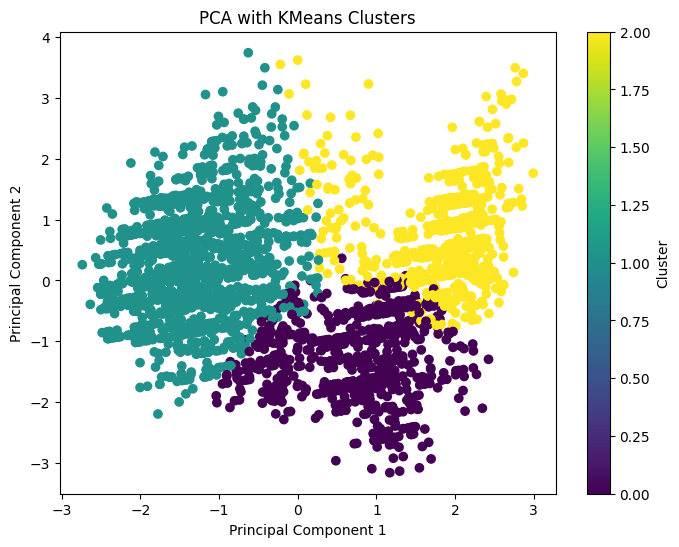

In [3]:
data = df.copy()
data = data.select_dtypes(include=['int', 'float'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(scaled_df)

kmeans = KMeans(n_clusters=3)  
kmeans.fit(scaled_df)
scaled_df['Cluster'] = kmeans.predict(scaled_df)
cluster_labes = scaled_df['Cluster']

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=scaled_df['Cluster'], cmap='viridis')
plt.title('PCA with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

LOOKING FOR ELBOW PLOT TO DECIDE NUMBER OF CLUSTER

In [4]:
wcss = []

for i in range(1, 15): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) 

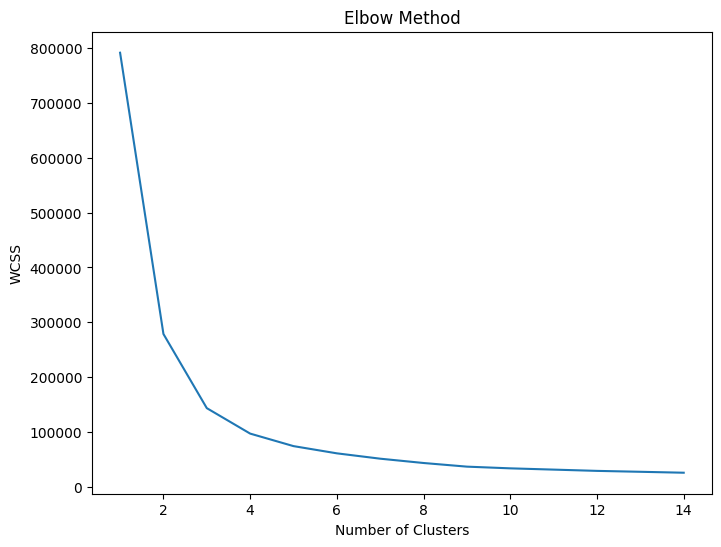

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

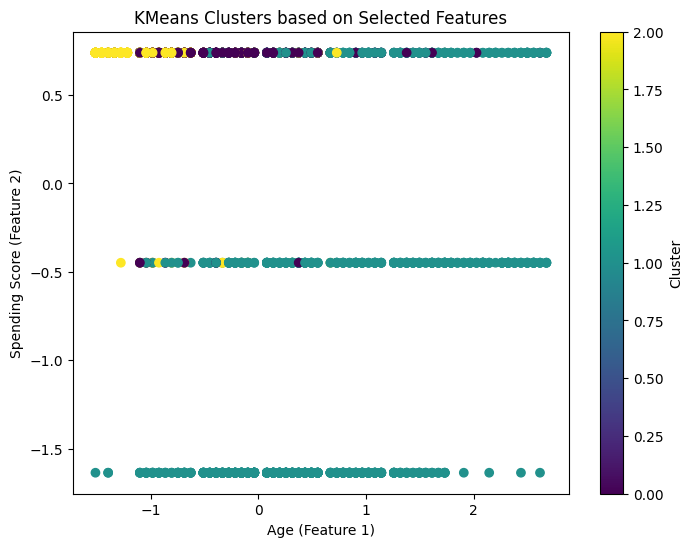

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['Age'], scaled_df['Spending_Score'], c=scaled_df['Cluster'], cmap='viridis')
plt.title('KMeans Clusters based on Selected Features')
plt.xlabel('Age (Feature 1)')
plt.ylabel('Spending Score (Feature 2)')
plt.colorbar(label='Cluster')
plt.show()

PLOTTING SILHOUTTE 

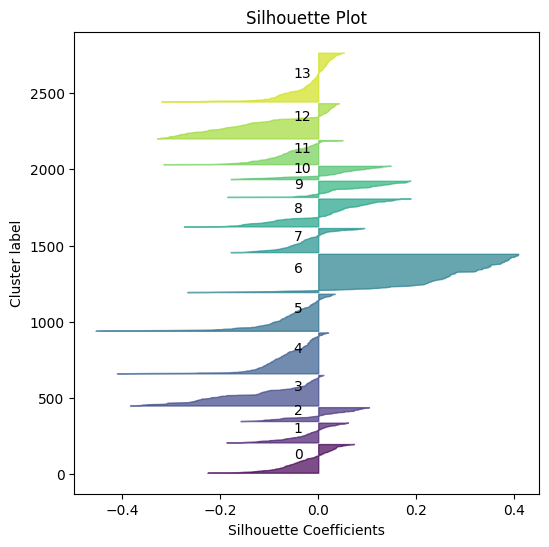

In [7]:
silhouette_vals = silhouette_samples(scaled_data, kmeans.labels_)

y_lower = 10
plt.figure(figsize=(6, 6))

for i in range(kmeans.n_clusters):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size

    color = plt.cm.viridis(float(i) / kmeans.n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot")
plt.xlabel("Silhouette Coefficients")
plt.ylabel("Cluster label")

plt.show()

/Users/harun/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/harun/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/harun/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/harun/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

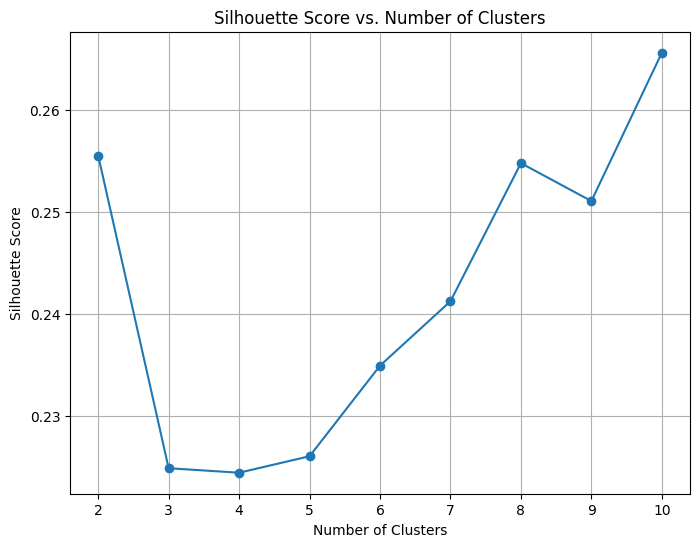

In [8]:
silhouette_scores = []

# Farklı küme sayıları için Silhouette skorlarını hesaplayın
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Silhouette skorlarını görselleştirin
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()

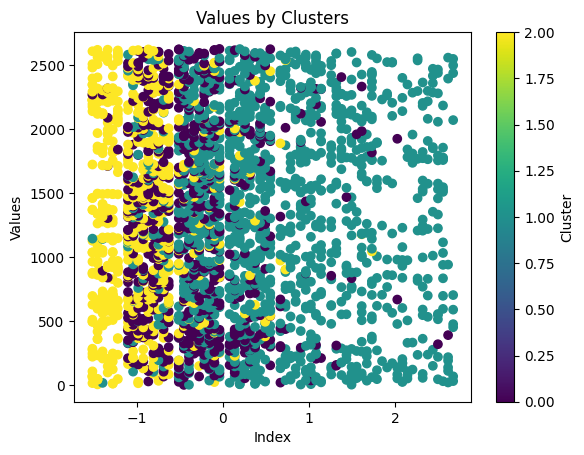

In [9]:
plt.scatter(y=scaled_df.index, x=scaled_df['Age'], c=scaled_df['Cluster'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values by Clusters')
plt.colorbar(label='Cluster')
plt.show()

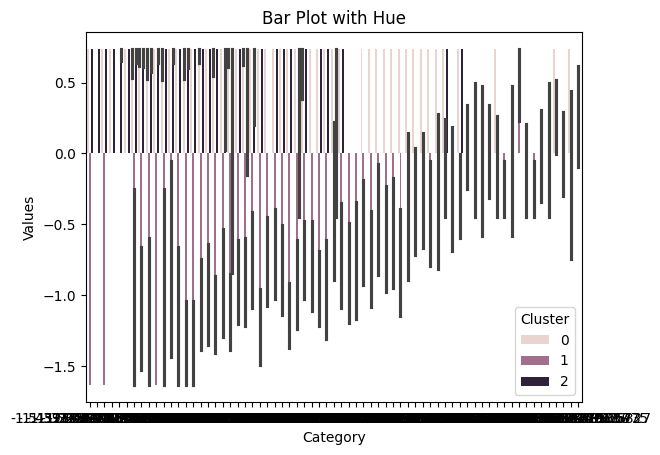

In [10]:
sns.barplot(x='Age', y='Spending_Score', data=scaled_df, hue='Cluster')
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Plot with Hue')
plt.show()

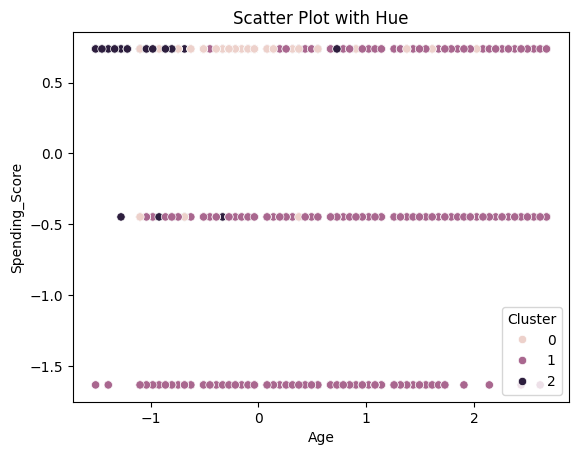

In [11]:
sns.scatterplot(x='Age', y='Spending_Score', data=scaled_df, hue='Cluster')
plt.xlabel('Age')
plt.ylabel('Spending_Score')
plt.title('Scatter Plot with Hue')
plt.show()

PLOTTING CLUSTER'S FEATURES

In [12]:
original_data = pd.read_csv('cleaned.csv')

In [13]:
original_data = original_data.drop('Category',axis=1)

In [14]:
original_data['Cluster'] = scaled_df['Cluster'].astype(int)
original_data.head()

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Age_Category,Cluster
0,0,458989,0,1,36,1,Engineer,0.0,Low,1.0,31-40,0
1,1,458994,1,1,37,1,Healthcare,8.0,Average,4.0,31-40,1
2,2,458996,0,1,69,0,Other,0.0,Low,1.0,61-70,1
3,3,459000,1,1,59,0,Executive,11.0,High,2.0,51-60,1
4,4,459001,0,0,19,0,Marketing,1.0,Low,4.0,18-30,2


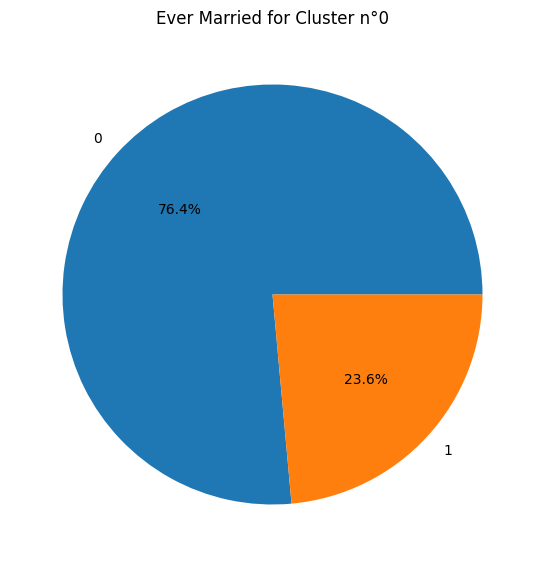

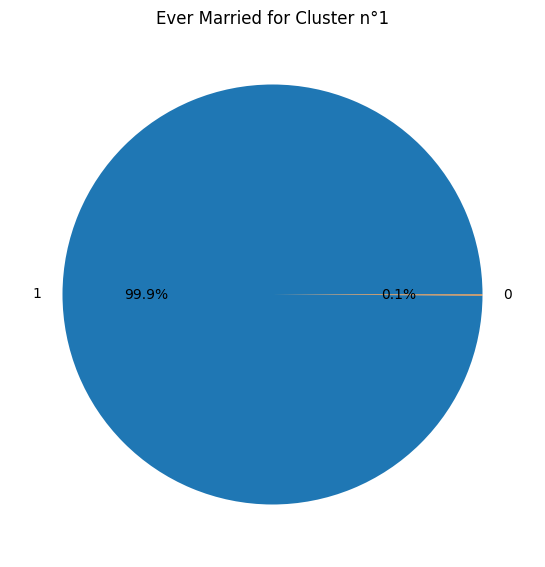

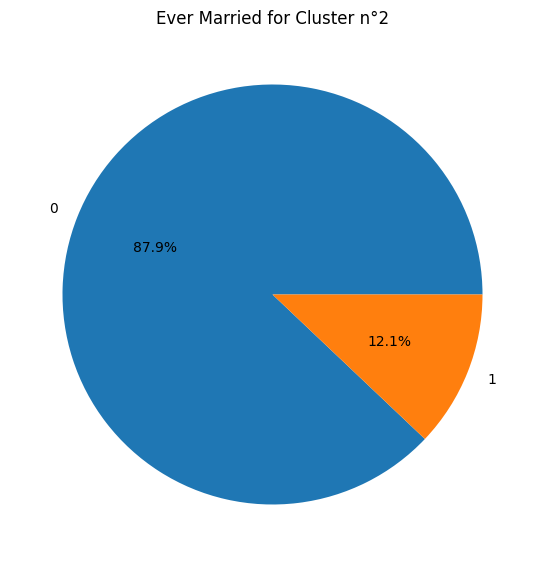

In [15]:
for i in [0,1,2]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = original_data.query("Cluster=="+str(i)).Ever_Married.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Ever Married for Cluster n°'+str(i))
    plt.show()

/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_14704/2385347358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(original_data.query("Cluster=="+str(i)),x="Profession",palette='Set2')
/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_14704/2385347358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(original_data.query("Cluster=="+str(i)),x="Profession",palette='Set2')
/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_14704/2385347358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(original_data.q

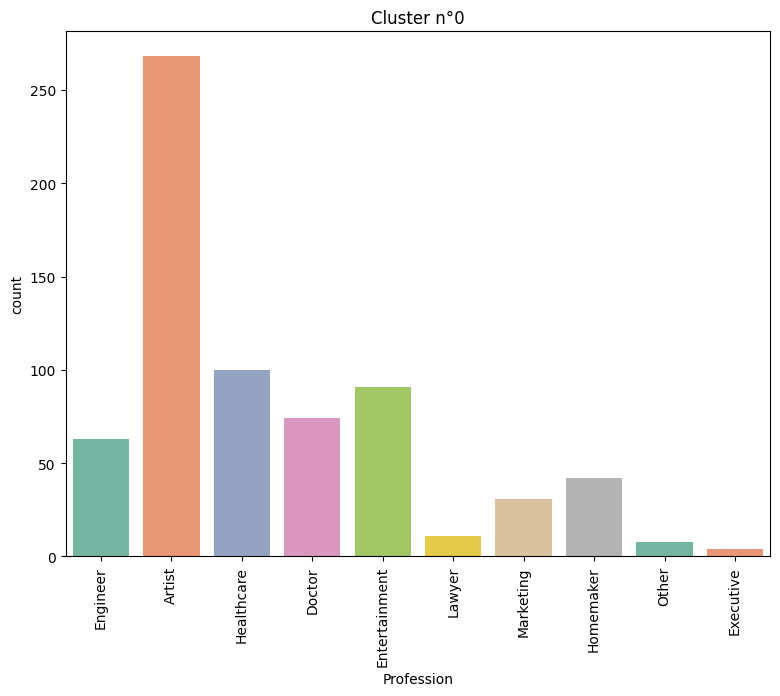

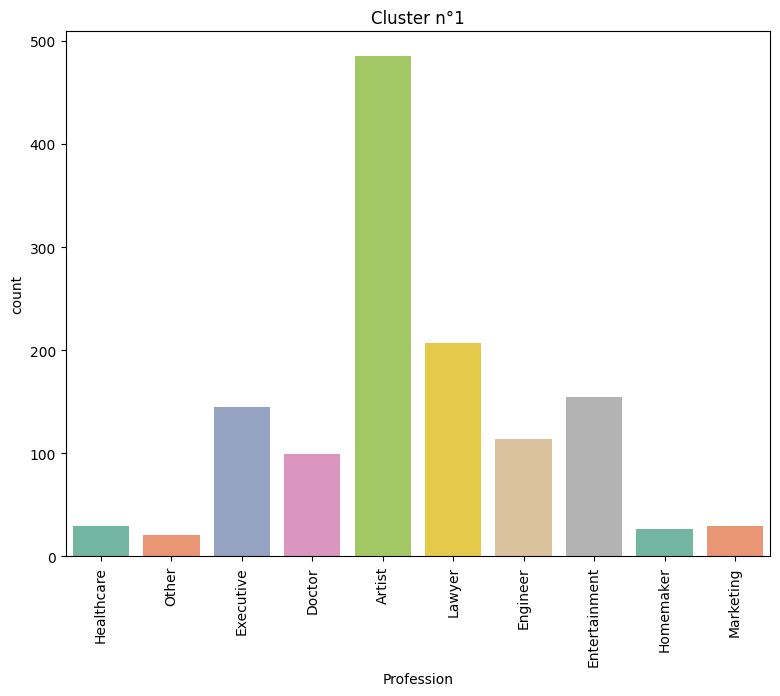

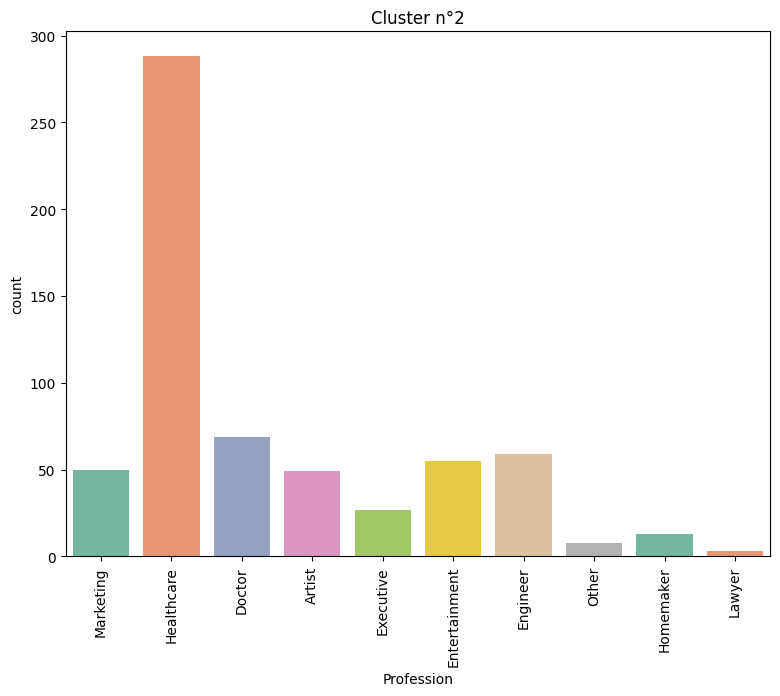

In [16]:
for i in [0,1,2]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    plt.title("Cluster n°"+str(i))
    original_data.query("Cluster=="+str(i))
    sns.countplot(original_data.query("Cluster=="+str(i)),x="Profession",palette='Set2')
    plt.xticks(rotation=90)

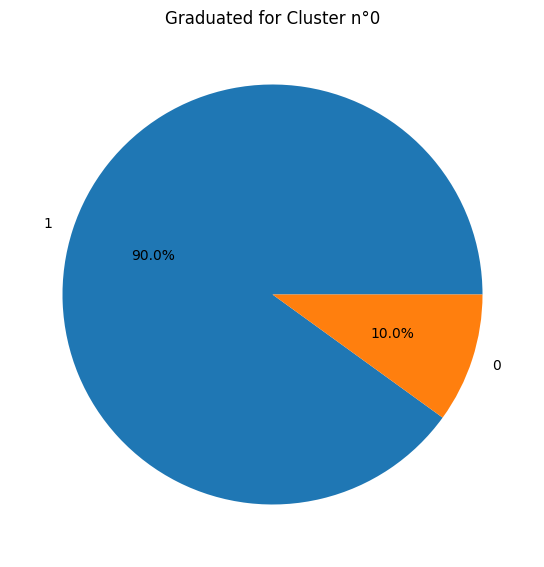

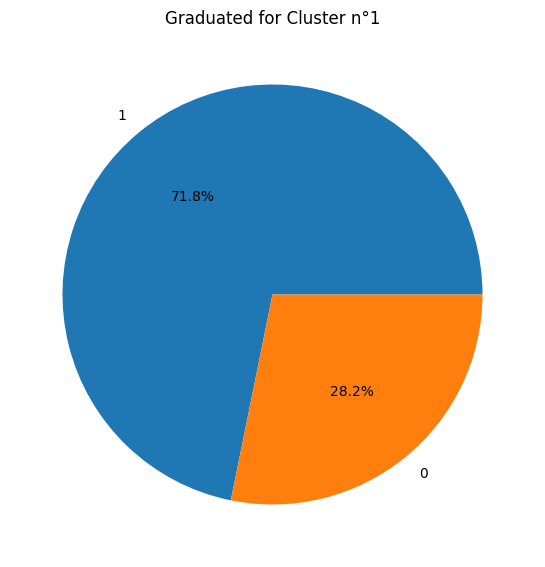

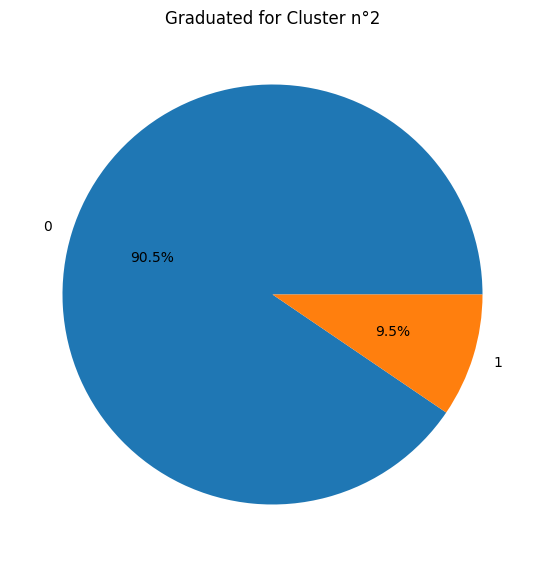

In [17]:
for i in [0,1,2]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = original_data.query("Cluster=="+str(i)).Graduated.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Graduated for Cluster n°'+str(i))
    plt.show()

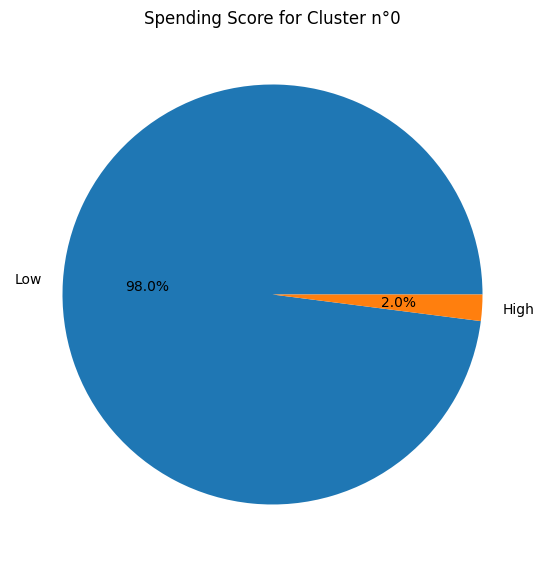

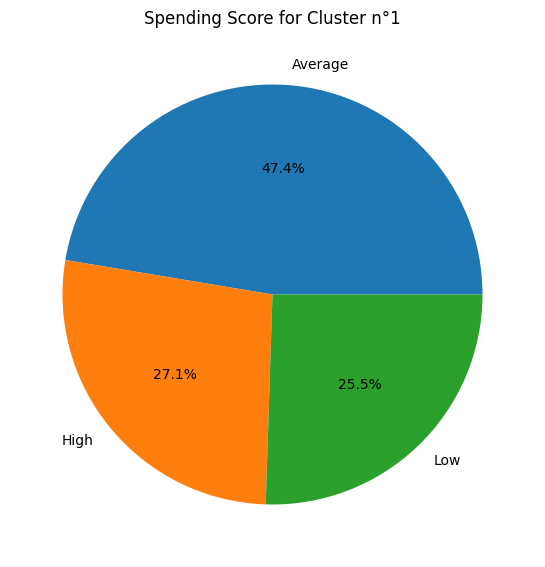

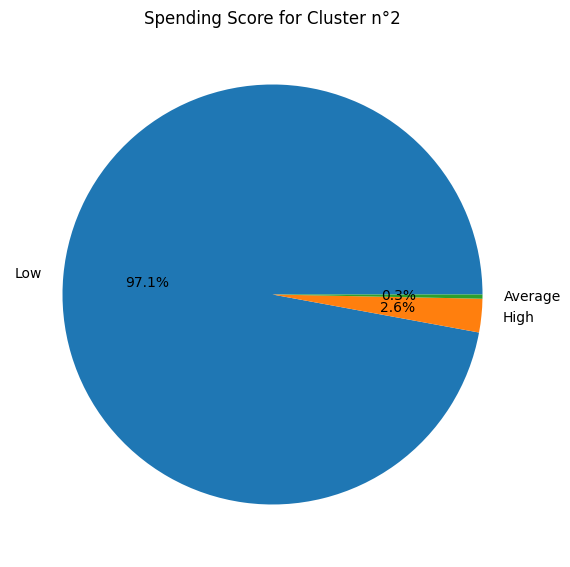

In [18]:
for i in [0,1,2]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = original_data.query("Cluster=="+str(i)).Spending_Score.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Spending Score for Cluster n°'+str(i))
    plt.show()

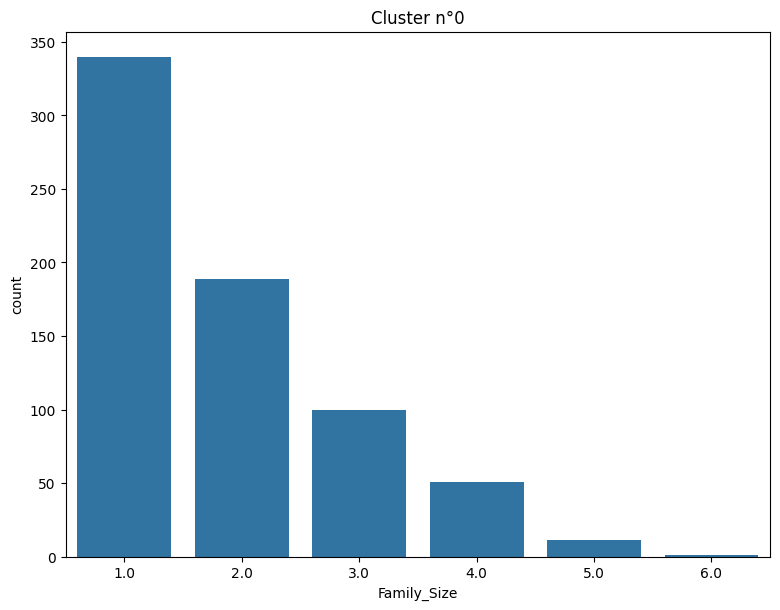

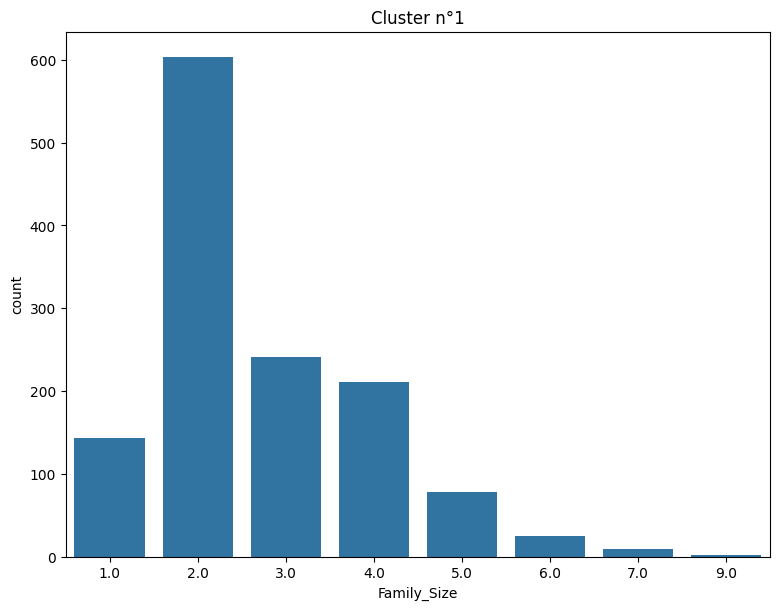

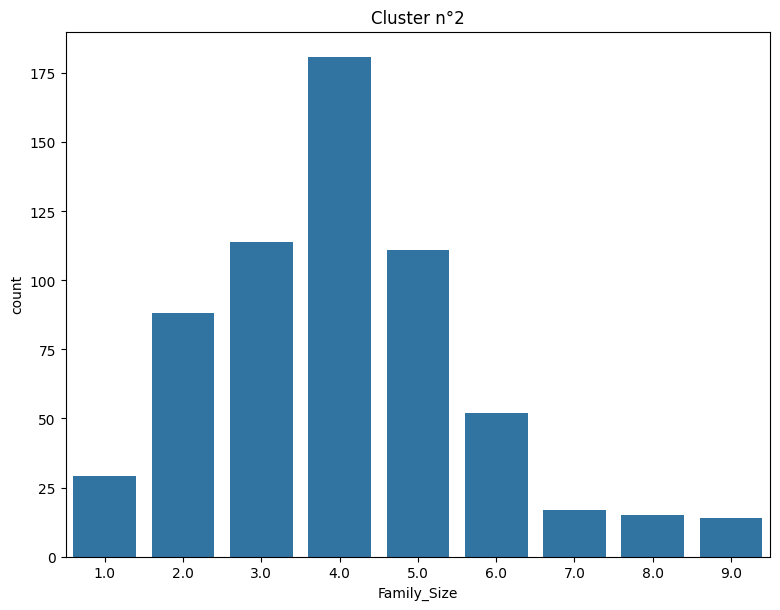

In [19]:
for i in [0,1,2]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    plt.title("Cluster n°"+str(i))
    original_data.query("Cluster=="+str(i))
    sns.countplot(original_data.query("Cluster=="+str(i)),x="Family_Size")

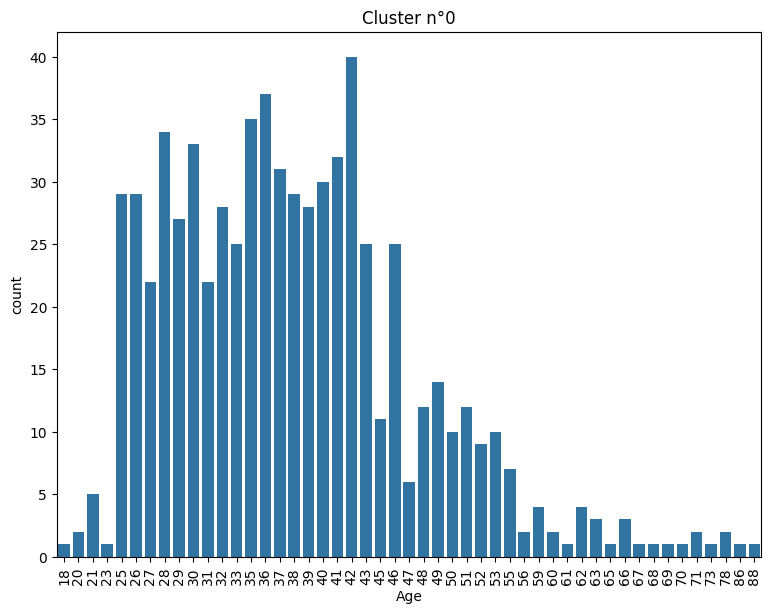

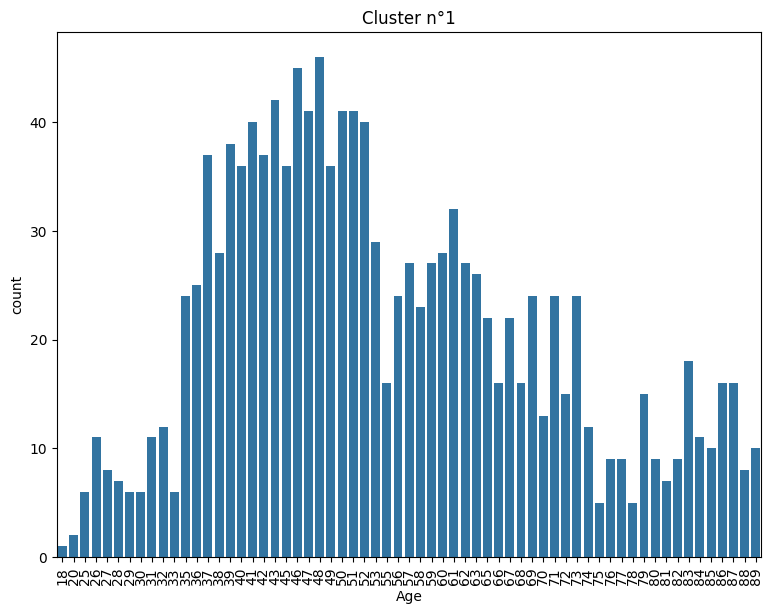

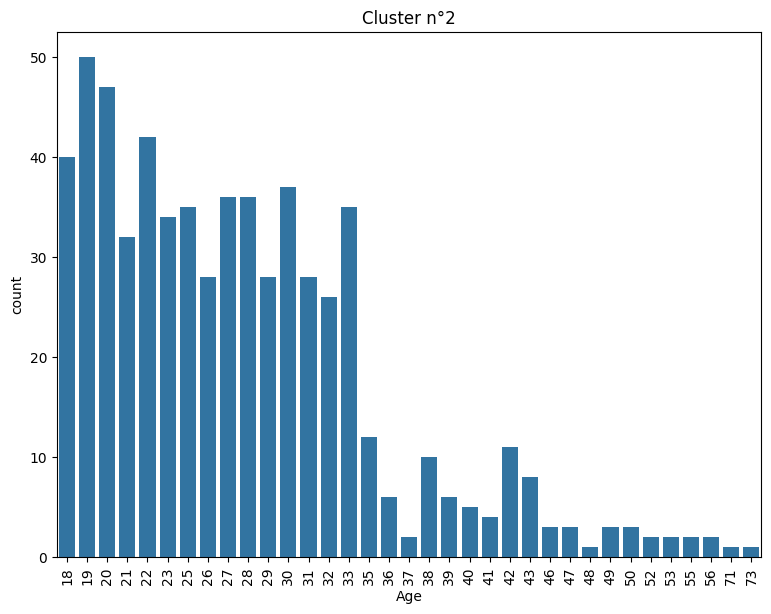

In [20]:
for i in [0,1,2]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    plt.title("Cluster n°"+str(i))
    original_data.query("Cluster=="+str(i))
    sns.countplot(original_data.query("Cluster=="+str(i)),x="Age")
    plt.xticks(rotation=90)

PRINTING CLUSTER'S REPORT 

In [21]:
convert = {'Low': 1, 'Average': 2, 'High': 3}
original_data['Spending_Score'] = df['Spending_Score'].map(convert)
original_data['Spending_Score'] = df['Spending_Score'].astype(int)

def cluster_analysis(df, cluster_col, age_col, profession_col, gender_col, spending_score_col, family_size_col):

    cluster_stats = {}

    clusters = df[cluster_col].unique()
    
    #COLLECTING FEATURE'S STATISTICS 

    for cluster in clusters:
   
        cluster_data = df[df[cluster_col] == cluster]
        avg_age = cluster_data[age_col].mean()
        most_common_occupation = cluster_data[profession_col].mode().values[0]
        gender_counts = cluster_data[gender_col].value_counts(normalize=True)
        spending_scores = cluster_data[spending_score_col]
        family_size_stats = cluster_data[family_size_col]

        cluster_stats[cluster] = {
            'Avg Age': avg_age,
            'Most Common Occupation': most_common_occupation,
            'Gender Ratio': gender_counts,
            'Spending Score Stats': {
                'Mean': spending_scores.mean(),
                'Median': spending_scores.median(),
                'Min': spending_scores.min(),
                'Max': spending_scores.max()
            },
            'Family Size Stats': {
                'Mean': family_size_stats.mean(),
                'Median': family_size_stats.median(),
                'Min': family_size_stats.min(),
                'Max': family_size_stats.max()
            }
        }
    # PRINTING CLUSTER REPORTS

    for cluster, stats in cluster_stats.items():
        print(f"Cluster {cluster} Statistics:")
        print(f"Avg Age: {stats['Avg Age']}")
        print(f"Most Common Occupation: {stats['Most Common Occupation']}")
        print("Gender Ratio:")
        for gender, ratio in stats['Gender Ratio'].items():
            print(f" - {gender}: {ratio:.2f}")
        print("Spending Score Stats:")
        for stat, value in stats['Spending Score Stats'].items():
            print(f" - {stat}: {value}")
        print("Family Size Stats:")
        for stat, value in stats['Family Size Stats'].items():
            print(f" - {stat}: {value}")
        print("\n")

In [22]:
cluster_analysis(original_data,'Cluster','Age', 'Profession', 'Gender', 'Spending_Score','Family_Size')

Cluster 0 Statistics:
Avg Age: 37.982658959537574
Most Common Occupation: Artist
Gender Ratio:
 - 0: 0.65
 - 1: 0.35
Spending Score Stats:
 - Mean: 1.9797687861271676
 - Median: 2.0
 - Min: 1
 - Max: 2
Family Size Stats:
 - Mean: 1.8540462427745665
 - Median: 2.0
 - Min: 1.0
 - Max: 6.0


Cluster 1 Statistics:
Avg Age: 54.28712871287129
Most Common Occupation: Artist
Gender Ratio:
 - 1: 0.61
 - 0: 0.39
Spending Score Stats:
 - Mean: 0.7814166031987814
 - Median: 1.0
 - Min: 0
 - Max: 2
Family Size Stats:
 - Mean: 2.6953541507996954
 - Median: 2.0
 - Min: 1.0
 - Max: 9.0


Cluster 2 Statistics:
Avg Age: 27.44283413848631
Most Common Occupation: Healthcare
Gender Ratio:
 - 1: 0.60
 - 0: 0.40
Spending Score Stats:
 - Mean: 1.9677938808373592
 - Median: 2.0
 - Min: 0
 - Max: 2
Family Size Stats:
 - Mean: 4.030595813204509
 - Median: 4.0
 - Min: 1.0
 - Max: 9.0


